##### 1. Problem Definition:

we will analyze the Titanic data set and make two predictions. 
One prediction to see which passengers on board the ship would survive and then another prediction to see if we would’ve survived.
Description: This program predicts if a passenger will survive on the titanic

#### 2. Data Analysis:

In [1]:
# Now import the packages /libraries to make it easier to write the program.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

#### 3. EDA Concluding Remark:

In [2]:
#Load the data
data=pd.read_csv('titanic_train.csv')

In [3]:
#Print the first 10 rows of data
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Now,Get a count of the number of rows and columns in the data set. 
Note that each row is a passenger onboard the ship and the columns are data points for each passenger.

In [4]:
#Count the number of rows and columns in the data set 
data.shape

(891, 12)

There are 891 rows/passengers and 12 columns/data points in the data set.

Get some statistics on the data set, such as the count, mean, standard deviation, etc.
After getting these statistics, I see the max price/fare a passenger paid for a ticket in this data set was 512.3292 British pounds,
and the minimum price/fare was 0 British pounds.

We can also see that there is some missing data for the age column as it’s less than 891 (the number of passengers in this data set).

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Get a count of the number of survivors on board the Titanic in this data set. Notice that, in this data set, 
there were more passengers that didn’t survive (549) than did (343).

In [6]:
#Get a count of the number of survivors  
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

###### Visualize the number of survivors on board the Titanic in this data set:

<AxesSubplot:xlabel='Survived', ylabel='count'>

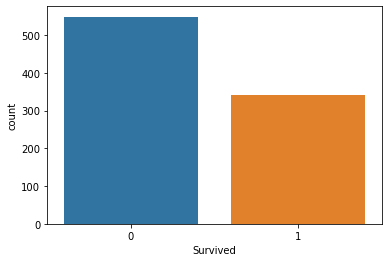

In [7]:
#Visualize the count of number of survivors
sns.countplot(data['Survived'],label="Count")

From the charts below,
Females are most likely to survive from the chart sex.
Third class is most likely to not survive by chart pclass.
If you have 0 siblings or spouses on board, you are not likely to survive according to chart sibsp.
If you have 0 parents or children on board, you are not likely to survive according to the parch chart.

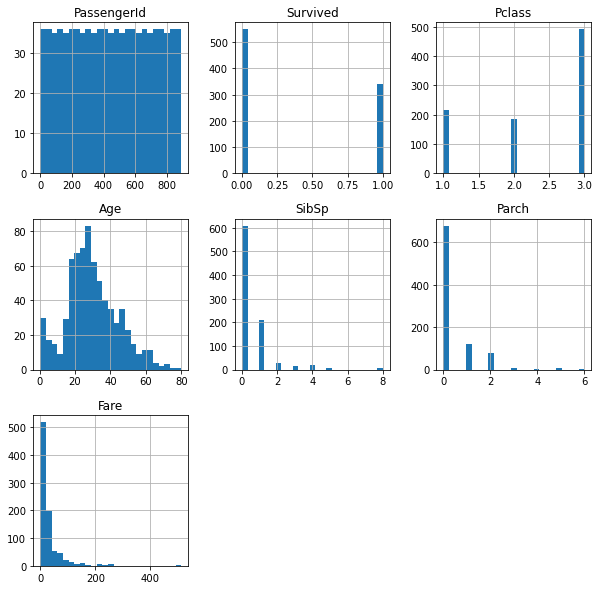

In [8]:
# display histogram
data.hist(bins=25,figsize=(10,10))
plt.show()

#### Pre-Processing Pipeline:

Next, we want to take a look at the survival rate by sex.
From the table below, we can see that about 74.2% of females survived and about 18.89% of males survived.

In [9]:
#Look at survival rate by sex
data.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


Look at the survival rate by sex and class.

From the pivot table below, we see that females in first class had a survival rate of about 96.8%, meaning the majority of them survived.
Males in third class had the lowest survival rate at about 13.54%, meaning the majority of them did not survive.

In [10]:
#Look at survival rate by sex and class
data.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Note that, in this data set, the oldest person is aged 80, so that will be our age limit.
We can see from the table below that women in first class that were 18 and older had the highest survival rate at 97.2973%, 
while men 18 and older in second class had the lowest survival rate of 7.1429%.

In [11]:
#Look at survival rate by sex, age and class
age = pd.cut(data['Age'], [0, 18, 80])
data.pivot_table('Survived', ['Sex', 'Age'], 'Pclass')

Pclass          1    2     3
Sex    Age                  
female 0.75   NaN  NaN  1.00
       1.00   NaN  NaN  1.00
       2.00   0.0  1.0  0.25
       3.00   NaN  1.0  0.00
       4.00   NaN  1.0  1.00
...           ...  ...   ...
male   70.00  0.0  0.0   NaN
       70.50  NaN  NaN  0.00
       71.00  0.0  NaN   NaN
       74.00  NaN  NaN  0.00
       80.00  1.0  NaN   NaN

[145 rows x 3 columns]

Check which columns contain empty values (NaN, NAN, na).
Looks like columns age, embarked, deck, and embarked_town are missing some values.

All the other columns are not missing any values.

In [12]:
#Count the empty (NaN, NAN, na) values in each column 
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Next, we will drop the redundant columns that are non-numerical and remove rows with missing values.
WE also decided to drop the column called deck because it's missing 688 rows of data which means 688/891 = 77.22% of the data is missing for this column.

In [13]:
#Count the NEW number of rows and columns in the data set
data.shape

(891, 12)

In [14]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Handling the missing values:

In [15]:
# drop the Cabin value:
data = data.drop(columns='Cabin', axis=1)
# Replacing the missing values in Age column with mean value:
data['Age'].fillna(data['Age'].mean(), inplace=True)
# Finding the mode value if 'Embarked' column
print(data['Embarked'].mode())
# Replaceing the missing value with Embarked:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

0    S
dtype: object


Now let us check if there are still any cells remaining empty.

Running the isnull() command again, we get the satisfactory output, that no such empty cells are present.

We have already noticed from the table, there are two columns that contain string-type values: The "Sex" column and the "Berth"column.

#### Transformation into a categorical column:

In [16]:
# Convert data into calegorical data:
data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

Now if we run the titanic_data.head() command again, we find that the values have been replaced successfully.

We also see, that there are few columns, which are not of much importance in this process. Let us get rid of them.

#### Split the data into independent ‘X’ and dependent ‘Y’ data sets:

In [17]:
#split feature and Target data
X=data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
Y=data['Survived']

Here, X is the feature variable, containing all the features like Pclass, Age, Sex, Embarked, etc. excluding the Survived column.

Y, on the other hand, is the target variable, as that is the result that we want to determine,i.e, whether a person is alive.

Now, we will be splitting the data into four variables, namely, X_train, Y_train, X_test, Y_test.

In [18]:
# Split the dataset into 80% Training set and 20% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

Let's understand the variables :

X_train: contains a set of values from variable ' X '

Y_train: contains the output (whether the person is alive or dead) of the corresponding value of X_train.

X_test: contains a set of values from variable ' X ', excluding the ones from X_train.

Y_train: contains the output (whether the person is alive or dead) of the corresponding value of X_test.

test_size:  represents the percentage ratio of X_train:X_test (Here 0.2 means that the data will be segregated in the X_train and X_test variables in a 80:20 ratio). You can use any value you want. A value <0.3 is preferred

In [19]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
norm_fit = norm.fit(X_train)
scal_X_train = norm_fit.transform(X_train)
scal_X_test = norm_fit.transform(X_test)
print(scal_X_train)

[[1.         1.         0.36592862 ... 0.33333333 0.02975782 0.5       ]
 [0.5        0.         0.38232699 ... 0.         0.02049464 0.        ]
 [0.5        0.         0.38232699 ... 0.16666667 0.07222739 0.5       ]
 ...
 [1.         0.         0.36592862 ... 0.         0.0150944  1.        ]
 [1.         1.         0.44535485 ... 0.         0.03396254 0.        ]
 [0.5        0.         0.74788857 ... 0.16666667 0.07612293 0.        ]]


#### Building Machine Learning Models:

Create a function that has within it many different machine learning models that we can use to make our predictions.

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [21]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
  
  #Using Logistic Regression method:
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method :
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Support Vector method:
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM medthod:
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method:
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier method:
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method:
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
    print('Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
    print('Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
    print('Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
    print('Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
    print('Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
    print('Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
    
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [22]:
model = models(X_train,Y_train)

Logistic Regression Training Accuracy: 0.8033707865168539
K Nearest Neighbor Training Accuracy: 0.7935393258426966
Support Vector Machine (Linear Classifier) Training Accuracy: 0.7865168539325843
Support Vector Machine (RBF Classifier) Training Accuracy: 0.6643258426966292
Gaussian Naive Bayes Training Accuracy: 0.7921348314606742
Decision Tree Classifier Training Accuracy: 0.9817415730337079
Random Forest Classifier Training Accuracy: 0.9648876404494382


Show the confusion matrix and accuracy for all the models on the test data.
The model that was most accurate on the test data is the model at position 0, 
which is the Logistic Regression Model with an accuracy of 81.11%, according to

In [23]:
from sklearn.metrics import confusion_matrix 
for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test)) 
   #extracting TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
    print(cm)
    print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
    print()# Print a new line

[[93 17]
 [18 51]]
Model[0] Testing Accuracy = "0.8044692737430168 !"

[[91 19]
 [30 39]]
Model[1] Testing Accuracy = "0.7262569832402235 !"

[[92 18]
 [20 49]]
Model[2] Testing Accuracy = "0.7877094972067039 !"

[[104   6]
 [ 44  25]]
Model[3] Testing Accuracy = "0.7206703910614525 !"

[[90 20]
 [17 52]]
Model[4] Testing Accuracy = "0.7932960893854749 !"

[[96 14]
 [23 46]]
Model[5] Testing Accuracy = "0.7932960893854749 !"

[[102   8]
 [ 26  43]]
Model[6] Testing Accuracy = "0.8100558659217877 !"



The model that I will use to predict if I would’ve survived, will be the model at position 6, the Random Forest Classifier.
I chose that model because it did second-best on the training and testing data and has an accuracy of 80.41% on the testing data and 97.53% on the training data.

#### Visualize the important features:

Print the Random Forest Classifier Model predictions for each passenger and, below it, print the actual values. 
Remember '1' means the passenger survived and '0' means the passenger did not survive.

In [26]:
# Print Prediction of Random Forest Classifier model
pred = model[6].predict(X_test)
print(pred)
#Print a space
print()

[0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0
 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1]



Now we see the hyperparamter tuning for the logreg_cv.best_params_.

In [32]:
# Creating the hyperparameter grid
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
c_space = np.logspace(-5, 5, 8)
param_grid = {'C': c_space}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv = 2)
logreg_cv.fit(X,Y)
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 5.1794746792312125}
Best score is 0.7934851614853631


Show the  Cross validated and , 
which is the Logistic Regression Model with Best score is 0.7934851614853631, according to

In [28]:
# here doing Cross validated:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X, Y, cv=5)
scores

array([0.79329609, 0.78651685, 0.79213483, 0.76966292, 0.8258427 ])

In [29]:
#Get the importance of the features
forest = model[6]
importances = pd.DataFrame({'feature':data.iloc[:, 1:8].columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
SibSp,0.277
Name,0.271
Pclass,0.231
Survived,0.088
Sex,0.053
Age,0.043
Parch,0.036


<AxesSubplot:xlabel='feature'>

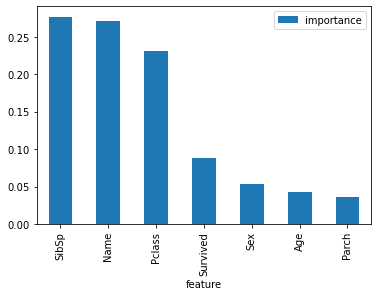

In [30]:
#Visualize the importance
importances.plot.bar()

#### Concluding Remarks:

We started with the data exploration where we got a feeling for the dataset, checked about missing data and learned which features are important. During this process we used seaborn and matplotlib to do the visualizations.
During the data preprocessing part, we computed missing values, converted features into numeric ones, and created a few new features. Afterwards we started training 8 different machine learning models,we looked into confusion matrix, 
picked one of them (LogisticRegression) and applied cross validation on it. 
Then we discussed how random forest works,look at the importance it assigns to the different features and tuned into hyperparameter values. Lastly,than Save the models and Visualize the importance datasets